**Group 5 - CelebA**

**Name**: 
1.   Chintan Sanghavi
2.   Himanshu Tyagi
3.   Vasanthi Raja





**Import Libraries/Dataset** 

*   **Download the dataset:** Data from Google Drive of CelebA was downloaded and extracted. After extraction it was uploaded to BITS Google Drive under \CelebA Directory
*   **Import the required libraries:** 

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#List the content (Access the google drive)
!ls "/content/gdrive/MyDrive/CelebA"
!ls "/content/gdrive/MyDrive/CelebA/Anno"

Anno  Eval  Img
celeb_attributes.csv  list_landmarks_align_celeba.txt
identity_CelebA.txt   list_landmarks_align_celeba_v1.csv
list_attr_celeba.txt  list_landmarks_celeba.txt
list_bbox_celeba.txt


Import Libraries

In [ ]:
## Following libraries will be uploaded to process the data and build model. 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image

import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt
import matplotlib.patches as patches




In [ ]:
## Defining the path to the datasets
key_points_data_path = "/content/gdrive/MyDrive/CelebA/Anno/celeb_attributes.csv"
images_data_path = "/content/gdrive/MyDrive/CelebA/Img"

# Since, the dataset is very huge. Hence, we will only select 250 images
images_data_size = 2000

# Original image dimensions
x_org = 178    # original x value
y_org = 218    # original y value

#Let's scale the images to new dimensions

# New image dimensions
x_ = 100                            # new value of x
image_size_ratio = x_org / y_org    # dimensions ratio
y_ = int(image_size_ratio * x_)     # new value of y

# Image Sizes
original_image_size = (x_org, y_org)
new_image_size = (x_,y_)

# The image size that will be used in the training process
image_size_training = new_image_size


In [ ]:
# load the dataset (key points)
df_org = pd.read_csv(key_points_data_path)
df_org = df_org[:images_data_size]
df_org.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [ ]:
df_org.head

<bound method NDFrame.head of         image_id  5_o_Clock_Shadow  ...  Wearing_Necktie  Young
0     000001.jpg                -1  ...               -1      1
1     000002.jpg                -1  ...               -1      1
2     000003.jpg                -1  ...               -1      1
3     000004.jpg                -1  ...               -1      1
4     000005.jpg                -1  ...               -1      1
...          ...               ...  ...              ...    ...
1995  001996.jpg                 1  ...               -1      1
1996  001997.jpg                -1  ...               -1      1
1997  001998.jpg                -1  ...               -1      1
1998  001999.jpg                -1  ...                1     -1
1999  002000.jpg                -1  ...               -1     -1

[2000 rows x 41 columns]>

In [ ]:
df_org = df_org.replace(-1, 0)
df_org.head

<bound method NDFrame.head of         image_id  5_o_Clock_Shadow  ...  Wearing_Necktie  Young
0     000001.jpg                 0  ...                0      1
1     000002.jpg                 0  ...                0      1
2     000003.jpg                 0  ...                0      1
3     000004.jpg                 0  ...                0      1
4     000005.jpg                 0  ...                0      1
...          ...               ...  ...              ...    ...
1995  001996.jpg                 1  ...                0      1
1996  001997.jpg                 0  ...                0      1
1997  001998.jpg                 0  ...                0      1
1998  001999.jpg                 0  ...                1      0
1999  002000.jpg                 0  ...                0      0

[2000 rows x 41 columns]>

In [ ]:
# This will help us to find out how many labels are very common. We can omit these lables. 

sum = (df_org.drop("image_id", axis=1).sum(axis=0))*100/255
sumarray = sum.array
sum

5_o_Clock_Shadow        92.941176
Arched_Eyebrows        211.764706
Attractive             403.529412
Bags_Under_Eyes        165.490196
Bald                    20.000000
Bangs                  118.823529
Big_Lips               192.156863
Big_Nose               183.921569
Black_Hair             189.803922
Blond_Hair             115.686275
Blurry                  42.352941
Brown_Hair             158.039216
Bushy_Eyebrows         116.862745
Chubby                  42.352941
Double_Chin             32.549020
Eyeglasses              48.627451
Goatee                  49.411765
Gray_Hair               41.176471
Heavy_Makeup           303.529412
High_Cheekbones        345.098039
Male                   331.764706
Mouth_Slightly_Open    378.823529
Mustache                28.235294
Narrow_Eyes             91.372549
No_Beard               654.901961
Oval_Face              203.137255
Pale_Skin               31.764706
Pointy_Nose            218.823529
Receding_Hairline       54.901961
Rosy_Cheeks   

In [ ]:
# Lets keep only following features
#Attractive
#Heavy_Makeup
#Smiling
#Straight_Hair
#Blond_Hair
#Bags_Under_Eyes
#Male
#Wearing_Lipstick
#Big_Nose
#Big_Lips

**Create Array of images**

In [ ]:
images_data = list()
for idx in range(df_org.shape[0]):
    # Retrieving the path based upon the index
    path = "{}/{}".format(str(images_data_path),str(df_org.iloc[idx].image_id))
    
    # Reading images using PIL library
    image = PIL.Image.open(path).resize(image_size_training)
    image_array = np.asarray(image) / 255
    
    # Appending the images to a list
    images_data.append(image_array)

len(images_data)



2000

In [ ]:
# Converting images_data to an array from list
images_data = np.array(images_data)
images_data.shape

(2000, 81, 100, 3)

**Display a sample image**

976


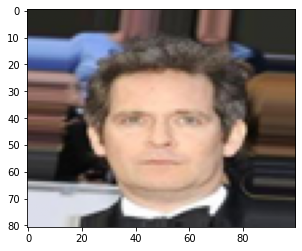

In [ ]:
import random

# Plotting a sample image
randomImage = random.randint(0, images_data_size)
print(randomImage)
plt.imshow(images_data[randomImage])

In [ ]:
print("Images Data Arrays Shape:", images_data.shape)
print("Key Points Data Shape:", df_org.shape)

Images Data Arrays Shape: (2000, 81, 100, 3)
Key Points Data Shape: (2000, 41)


In [ ]:
df_org.isnull().sum()

image_id               0
5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0
No_Beard               0
Oval_Face              0
Pale_Skin              0
Pointy_Nose            0
Receding_Hairline      0
Rosy_Cheeks            0
Sideburns              0
Smiling                0
Straight_Hair          0
Wavy_Hair              0
Wearing_Earrings       0
Wearing_Hat            0
Wearing_Lipstick       0
Wearing_Necklace       0
Wearing_Necktie        0


In [ ]:
df_org.describe()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,2000.00000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.11850,0.27000,0.514500,0.21100,0.025500,0.151500,0.245000,0.234500,0.242000,0.147500,0.054000,0.201500,0.149000,0.054000,0.041500,0.062000,0.063000,0.052500,0.387000,0.440000,0.423000,0.483000,0.036000,0.116500,0.835000,0.259000,0.040500,0.27900,0.070000,0.070500,0.059500,0.480000,0.207500,0.307000,0.201500,0.04550,0.463500,0.131000,0.081000,0.771500
std,0.32328,0.44407,0.499915,0.40812,0.157677,0.358625,0.430195,0.423792,0.428401,0.354692,0.226074,0.401221,0.356178,0.226074,0.199493,0.241216,0.243024,0.223089,0.487185,0.496511,0.494159,0.499836,0.186337,0.320904,0.371273,0.438195,0.197178,0.44862,0.255211,0.256052,0.236617,0.499725,0.405618,0.461365,0.401221,0.20845,0.498791,0.337485,0.272903,0.419971
min,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
50%,0.00000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,0.00000,1.00000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000
max,1.00000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


**Reading Images Function**

In [ ]:
# function to read images based on index (image number passed)
def image_array(index, size=image_size_training, path=images_data_path):
    """
    This functions is for converting images to arrays to deal with it in the model.
    
    Input:  index of the image that we want to convert to array
            size of the image that we want for the array of the image
            path of the images data to get the image
            
    Output: the image array as numpy array
    """
    # to get the path based on index
    path = "{}/{}".format(str(path),str(df_org.iloc[index].image_id))
    
    # to read the image
    image = PIL.Image.open(path).resize(size)
    image_array = np.asarray(image)
    
    return image_array

In [ ]:
# function to get a list of all key points of the face
def image_key_points_list(index, df = df_org):
    """
    This function for getting the key points on the face as list to deal with it in plotting sections
    """
    # box dictionary
    points_list = [df.iloc[index].Attractive,
                   df.iloc[index].Heavy_Makeup,
                   df.iloc[index].Smiling,
                   df.iloc[index].Straight_Hair,
                   df.iloc[index].Blond_Hair,
                   df.iloc[index].Bags_Under_Eyes,
                   df.iloc[index].Male,
                   df.iloc[index].Wearing_Lipstick,
                   df.iloc[index].Big_Nose,
                   df.iloc[index].Big_Lips]
    
    return points_list

In [ ]:
# function to get a list of all key attributes of the face
def image_key_attributes_name():
    """
    This function for getting the key attributes on the face as list
    """
    # Attributes dictionary
    attr_list = ['Attractive',
                   'Heavy_Makeup',
                   'Smiling',
                   'Straight_Hair',
                   'Blond_Hair',
                   'Bags_Under_Eyes',
                   'Male',
                   'Wearing_Lipstick',
                   'Big_Nose',
                   'Big_Lips']
    
    return attr_list

no_attributes = len(image_key_attributes_name())
print(no_attributes)

10


In [ ]:
df_new = df_org[["Attractive", "Heavy_Makeup", "Smiling", "Straight_Hair", "Blond_Hair", "Bags_Under_Eyes", "Male", "Wearing_Lipstick", "Big_Nose", "Big_Lips"]]
df_new


,Attractive,Heavy_Makeup,Smiling,Straight_Hair,Blond_Hair,Bags_Under_Eyes,Male,Wearing_Lipstick,Big_Nose,Big_Lips
0,1,1,1,1,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0,1,0
2,0,0,0,0,0,0,1,0,0,1
3,1,0,0,1,0,0,0,1,0,0
4,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,1,0,1,0
1996,1,1,1,0,0,0,0,1,0,0
1997,0,0,0,0,0,0,1,0,0,0
1998,0,0,1,0,0,1,1,0,1,1


In [ ]:
# function to display the image & its attributes
def display_image_attributes(index, df = df_org, size=original_image_size):

    test_image = image_array(index, size)
    points_list = image_key_points_list(index, df)
    attr_list = image_key_attributes_name()
        
    # Create figure and axes
    fig, ax = plt.subplots()
    # plot the image
    ax.imshow(test_image)

    iAttr = 0
    for  point in points_list:
      present = "No"
      if point == 1:
        present = "Yes"
      print(attr_list[iAttr], "-->", present)
      iAttr = iAttr + 1
      

Attractive --> No
Heavy_Makeup --> No
Smiling --> Yes
Straight_Hair --> No
Blond_Hair --> No
Bags_Under_Eyes --> No
Male --> Yes
Wearing_Lipstick --> No
Big_Nose --> Yes
Big_Lips --> Yes


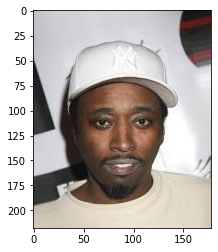

In [ ]:
# Display Image attributes
display_image_attributes(random.randint(1, images_data_size))

## Preparing the data for our Deep Learning

In [ ]:
# copy a version from the data to prepare it for analysis
df = df_new.copy()

# check
df.head(5)

,Attractive,Heavy_Makeup,Smiling,Straight_Hair,Blond_Hair,Bags_Under_Eyes,Male,Wearing_Lipstick,Big_Nose,Big_Lips
0,1,1,1,1,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0,1,0
2,0,0,0,0,0,0,1,0,0,1
3,1,0,0,1,0,0,0,1,0,0
4,1,1,0,0,0,0,0,1,0,1


In [ ]:
# function for updating key points for a new size
#def rescale_key_points(oldsize=original_image_size, newsize=image_size_training):
#    """
#    This function is for rescaling the key points from the original scale to a nwe scale from our chossen and we reduce
#    the image size to make the analysis faster and using lower memory
#    """
#    # old and nwe sizes (x,y) values
#    x_axis_old = oldsize[0]
#    y_axis_old = oldsize[1]
#
#    x_axis_new = newsize[0]
#    y_axis_new = newsize[1]
#
#    x_ratio = x_axis_new / x_axis_old
#    y_ratio = y_axis_new / y_axis_old
#    
#    # converting the keypoints values to be trained with the new size of the images
#    keypoints_x = ['lefteye_x', 'righteye_x', 'nose_x', 'leftmouth_x', 'rightmouth_x']
#    keypoints_y = ['lefteye_y', 'righteye_y', 'nose_y', 'leftmouth_y', 'rightmouth_y']
    
#    df[keypoints_x] = (df[keypoints_x] * x_ratio).astype('int')
#    df[keypoints_y] = (df[keypoints_y] * y_ratio).astype('int')
    
#    return 0

# call the function
#rescale_key_points()

# check
#df.head()


In [ ]:
images=images_data
labels=df

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_images,test_images,train_labels,test_labels=train_test_split(images,labels,
                                                                  test_size=0.3,random_state=42)

In [ ]:
y_test=test_labels
y_train=train_labels

X_test=test_images
X_train=train_images

In [ ]:
## Further splitting the test data into validation and test data
X_test, X_val, y_test, y_val=train_test_split(X_test, y_test,
                                              test_size=0.5,random_state=42)

In [ ]:
y_test.head(3)


,Attractive,Heavy_Makeup,Smiling,Straight_Hair,Blond_Hair,Bags_Under_Eyes,Male,Wearing_Lipstick,Big_Nose,Big_Lips
49,1,0,1,0,0,0,1,0,0,0
1389,0,1,1,0,0,0,0,1,0,1
1861,0,0,0,0,0,1,0,0,0,1


In [ ]:
y_val.head(3)

,Attractive,Heavy_Makeup,Smiling,Straight_Hair,Blond_Hair,Bags_Under_Eyes,Male,Wearing_Lipstick,Big_Nose,Big_Lips
771,1,1,0,0,0,0,0,1,0,0
1788,1,1,1,0,0,0,0,1,0,0
1106,0,0,0,0,0,0,0,0,0,0


# MobileNetV2 Model

In [ ]:
# This is addition of new code as Seuqential model is not giving results as expected. 
from keras.models import Model 
from keras.layers import Dropout, Dense, BatchNormalization
from keras.applications.mobilenet_v2 import MobileNetV2

x__ = image_size_training[0]
y__ = image_size_training[1]

base = MobileNetV2(input_shape=(y__, x__, 3),
                    weights=None,
                    include_top=False,
                    pooling='avg')  # GlobalAveragePooling 2D

# model top
x = base.output
x = Dense(1536, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
top = Dense(no_attributes, activation='sigmoid')(x)

modelv01=Model(inputs=base.input, outputs=top)
modelv01.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 81, 100, 3)] 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 41, 50, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 41, 50, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 41, 50, 32)   0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [ ]:
#modelv01.compile(loss='mean_squared_error',
#              optimizer='adadelta',
#              metrics='binary_accuracy')

modelv01.compile(optimizer="rmsprop", loss='mean_squared_error',metrics=["mae"])


# Sequential Model

In [ ]:
## Building the CNN-based Deep Learning model
# diminsions of the image in the training process
x_ = image_size_training[0]
y_ = image_size_training[1]

# build the model
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation="relu", input_shape=(y_,x_,3)))
model.add(Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))  # Output Layer. Ideally reduce number of outputs


In [ ]:
## Having a quick view of the model architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 81, 100, 8)        224       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 81, 100, 8)        584       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 40, 50, 8)         0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 40, 50, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 40, 50, 16)        1168      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 40, 50, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 20, 25, 16)       

In [ ]:
model.compile(optimizer="rmsprop", loss='mean_squared_error',metrics=["mae"])


# Model Training

In [ ]:
# fitting the model with our data & this is for sequential model
training_process = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=4, shuffle=True)

Epoch 1/20
350/350 [==============================] - 22s 60ms/step - loss: 0.2578 - mae: 0.3816 - val_loss: 0.2300 - val_mae: 0.3782
Epoch 2/20
350/350 [==============================] - 20s 57ms/step - loss: 0.2438 - mae: 0.3924 - val_loss: 0.2290 - val_mae: 0.3887
Epoch 3/20
350/350 [==============================] - 20s 57ms/step - loss: 0.2412 - mae: 0.3970 - val_loss: 0.2288 - val_mae: 0.3882
Epoch 4/20
350/350 [==============================] - 20s 57ms/step - loss: 0.2402 - mae: 0.3978 - val_loss: 0.2291 - val_mae: 0.3884
Epoch 5/20
350/350 [==============================] - 20s 57ms/step - loss: 0.2394 - mae: 0.3989 - val_loss: 0.2294 - val_mae: 0.3946
Epoch 6/20
350/350 [==============================] - 20s 56ms/step - loss: 0.2387 - mae: 0.3992 - val_loss: 0.2287 - val_mae: 0.3926
Epoch 7/20
350/350 [==============================] - 20s 56ms/step - loss: 0.2381 - mae: 0.3988 - val_loss: 0.2292 - val_mae: 0.3919
Epoch 8/20
350/350 [==============================] - 20s 56ms

In [ ]:
## Testing the model
### Evaluating the model performance on the basis of 
model.evaluate(X_test, y_test)

10/10 [==============================] - 1s 93ms/step - loss: 0.2393 - mae: 0.4009


[0.23927907645702362, 0.4008978009223938]

Training of Mobile V2 model

In [ ]:
training_process_v2 = modelv01.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=4, shuffle=True)


Epoch 1/20
350/350 [==============================] - 90s 232ms/step - loss: 0.2525 - mae: 0.4064 - val_loss: 0.2111 - val_mae: 0.3882
Epoch 2/20
350/350 [==============================] - 79s 225ms/step - loss: 0.2301 - mae: 0.3915 - val_loss: 0.2159 - val_mae: 0.4141
Epoch 3/20
350/350 [==============================] - 80s 229ms/step - loss: 0.2292 - mae: 0.3930 - val_loss: 0.2273 - val_mae: 0.3938
Epoch 4/20
350/350 [==============================] - 79s 225ms/step - loss: 0.2299 - mae: 0.3966 - val_loss: 0.2059 - val_mae: 0.3824
Epoch 5/20
350/350 [==============================] - 78s 224ms/step - loss: 0.2226 - mae: 0.3935 - val_loss: 0.2143 - val_mae: 0.4014
Epoch 6/20
350/350 [==============================] - 78s 224ms/step - loss: 0.2259 - mae: 0.3991 - val_loss: 0.2050 - val_mae: 0.3997
Epoch 7/20
350/350 [==============================] - 77s 221ms/step - loss: 0.2232 - mae: 0.3985 - val_loss: 0.2039 - val_mae: 0.4079
Epoch 8/20
350/350 [==============================] - 7

In [ ]:
modelv01.evaluate(X_test, y_test)

10/10 [==============================] - 3s 172ms/step - loss: 0.2669 - mae: 0.3527


[0.26694679260253906, 0.35265612602233887]

In [ ]:
def predictions_test_model(index, modelName):
    img = tf.keras.preprocessing.image.load_img("{}/0{}.jpg".format(images_data_path, index),target_size=(y_,x_,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img/255
    points_list = ""
    if modelName == "Mobile":
      points_list = model.predict(img.reshape(1,y_,x_,3)).astype('int')[0] 
    elif modelName == "Sequential":
      points_list = model.predict(img.reshape(1,y_,x_,3)).astype('int')[0]
    
    return points_list

In [ ]:
# function to plot the image with green box around the faces
def test_image_with_box_plot(index, pred_or_actual = 'pred', pointsColor='bo-' ,boxcolor='g', modelName="Sequential"):
    print("{}/0{}.jpg".format(images_data_path, index))
    img = tf.keras.preprocessing.image.load_img("{}/0{}.jpg".format(images_data_path, index),target_size=(y_org,x_org,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    test_image = img/255
    
    # predictions of key points on the face
    if pred_or_actual == 'pred':
        points_list = predictions_test_model(index, modelName)        # this for predections of the model
    elif pred_or_actual == 'actual':
        points_list = image_key_points_list(int(index))   # this for the actual labels of the test data
    
    # Create figure and axes
    fig, ax = plt.subplots()
    
    # plot the image
    ax.imshow(test_image)
    
    return points_list

/content/gdrive/MyDrive/CelebA/Img/000427.jpg
0
0
0
0
0
0
0
0
0
0


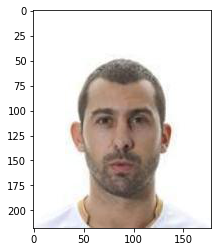

In [ ]:
# Using the model to predict a sample image which doesn't exist in train,test, or validation data
index = str(random.randint(1,images_data_size )).zfill(5)
attributes_list = test_image_with_box_plot(index, pred_or_actual = 'pred', pointsColor='mo-' ,boxcolor='r', modelName="Sequential")
for attribute in attributes_list:
  print(attribute)

/content/gdrive/MyDrive/CelebA/Img/000427.jpg
0
0
0
0
0
0
0
0
0
0


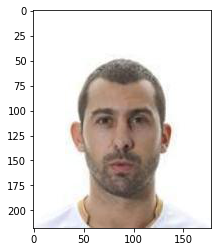

In [ ]:
attributes_list1 = test_image_with_box_plot(index, pred_or_actual = 'pred', pointsColor='mo-' ,boxcolor='r', modelName="Mobile")
for attribute1 in attributes_list1:
  print(attribute1)

/content/gdrive/MyDrive/CelebA/Img/000427.jpg
1
0
1
0
0
1
1
0
1
0


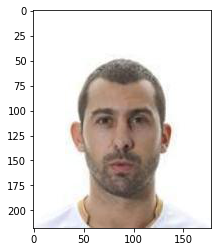

In [ ]:
attributes_list = test_image_with_box_plot(str(index), pred_or_actual = 'actual', pointsColor='mo-' ,boxcolor='r')
for attribute in attributes_list:
  print(attribute)

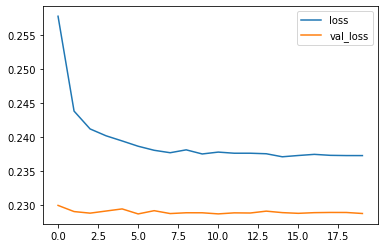

In [ ]:
# losses of both training and validation sets
loss = training_process.history['loss']
val_loss = training_process.history['val_loss']

# plot both losses
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss']);

In [ ]:
## Saving the model for future use
model.save("modelv01.h5")